## Repaso de conceptos basicos

In [17]:
#%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(precision=2)


fruits = pd.read_table('fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)

## Datasets

In [10]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

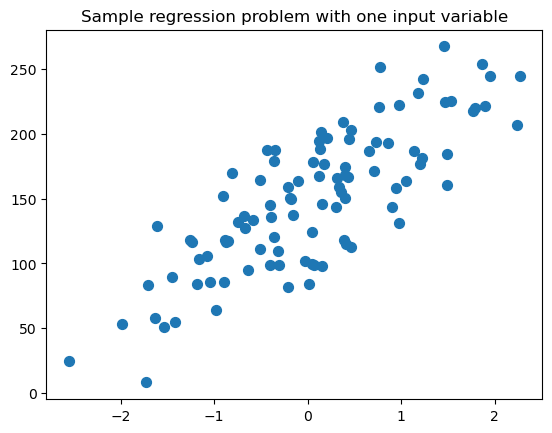

In [25]:
# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

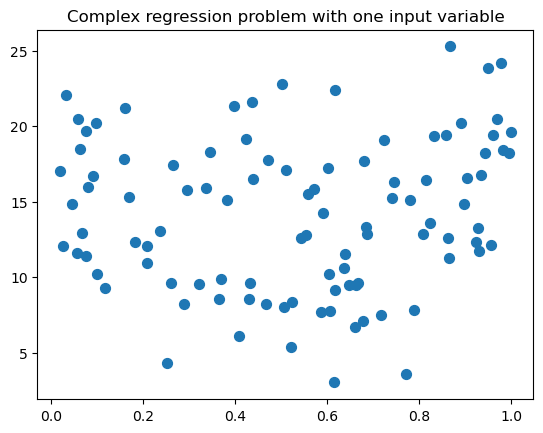

In [12]:
# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

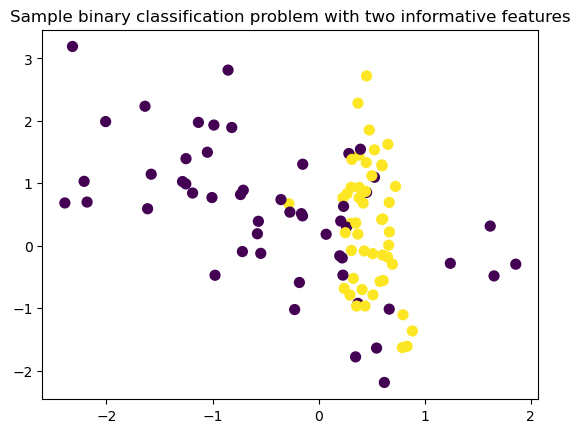

In [27]:
# synthetic dataset for classification (binary) 
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50)
plt.show()

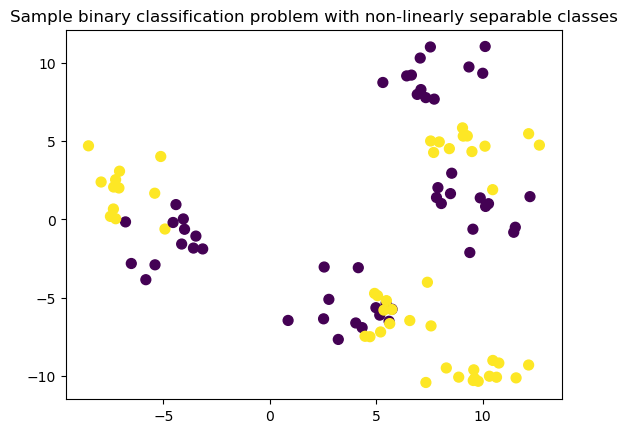

In [28]:
# more difficult synthetic dataset for classification (binary) 
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50)
plt.show()

In [29]:
# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

In [30]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the dataset
data = load_breast_cancer()

# Convert to DataFrame for better visualization
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFeature Names:\n", data.feature_names)
print("\nTarget Names:", data.target_names)
print("\nClass Distribution:\n", df['target'].value_counts())

Dataset Shape: (569, 31)

Feature Names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target Names: ['malignant' 'benign']

Class Distribution:
 target
1    357
0    212
Name: count, dtype: int64


## EJEMPLO DE COMPLEJIDAD VS. PRECISION

In [31]:
knn = KNeighborsClassifier(n_neighbors = 5) # PROBAR DIFERENTES N PARA VER OVERFITTING
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))
print(knn.score(X_train,y_train))

0.5333333333333333
0.7954545454545454


In [32]:
knn = KNeighborsClassifier(n_neighbors = 1) # PROBAR DIFERENTES N PARA VER OVERFITTING
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))
print(knn.score(X_train,y_train))

0.6
1.0


In [33]:
knn = KNeighborsClassifier(n_neighbors = 10) # PROBAR DIFERENTES N PARA VER OVERFITTING
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))
print(knn.score(X_train,y_train))

0.3333333333333333
0.5909090909090909


## K-Nearest Neighbors (complejidad vs. precsion)

### Classification

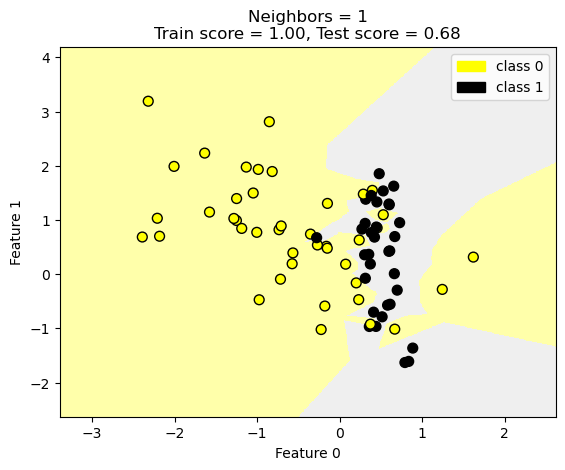

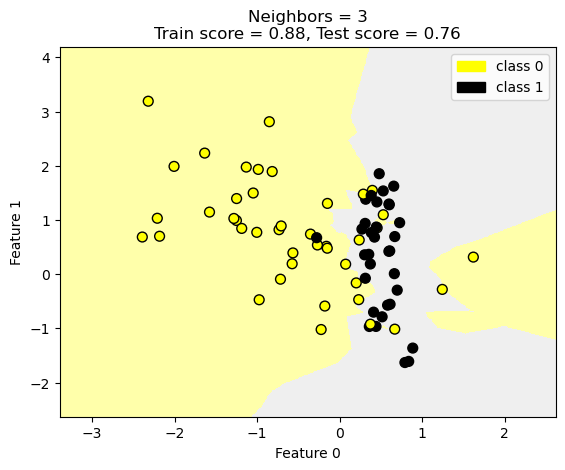

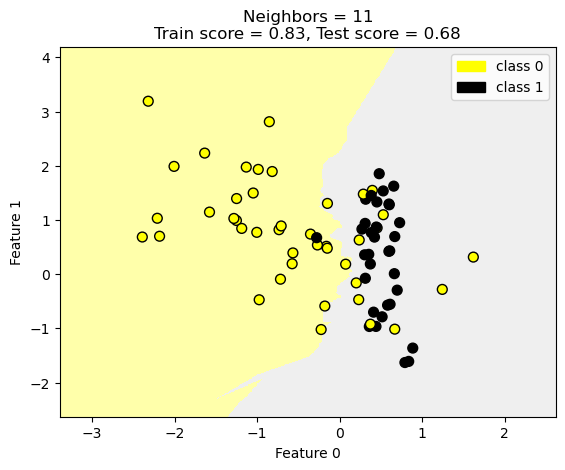

In [34]:
from adspy_shared_utilities import plot_two_class_knn

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,
                                                   random_state=50)

plot_two_class_knn(X_train, y_train, 1, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 3, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 11, 'uniform', X_test, y_test)

### Regression

In [35]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))

[231.71 148.36 150.59 150.59  72.15 166.51 141.91 235.57 208.26 102.1
 191.32 134.5  228.32 148.36 159.17 113.47 144.04 199.23 143.19 166.51
 231.71 208.26 128.02 123.14 141.91]
R-squared test score: 0.425


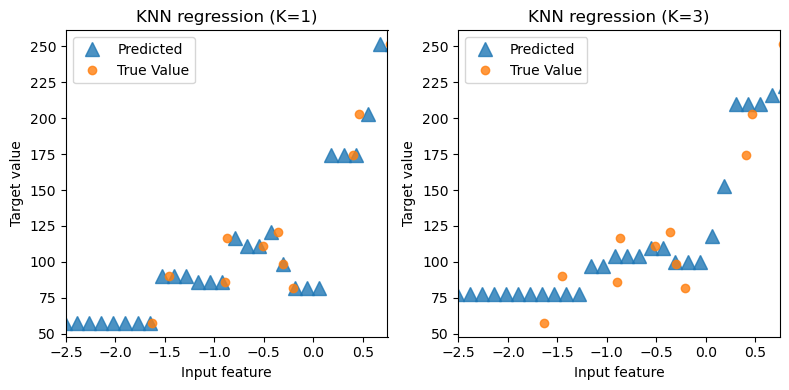

In [36]:
fig, subaxes = plt.subplots(1, 2, figsize=(8,4))
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    thisaxis.set_xlim([-2.5, 0.75])
    thisaxis.plot(X_predict_input, y_predict_output, '^', markersize = 10,
                 label='Predicted', alpha=0.8)
    thisaxis.plot(X_train, y_train, 'o', label='True Value', alpha=0.8)
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()
plt.tight_layout()

### COmplejidad de la regresion en funcion de K

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/joblib/externals/loky/backend/context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/joblib/externals/loky/backend/context.py", line 217, in _count_physical_cores
    raise ValueError(


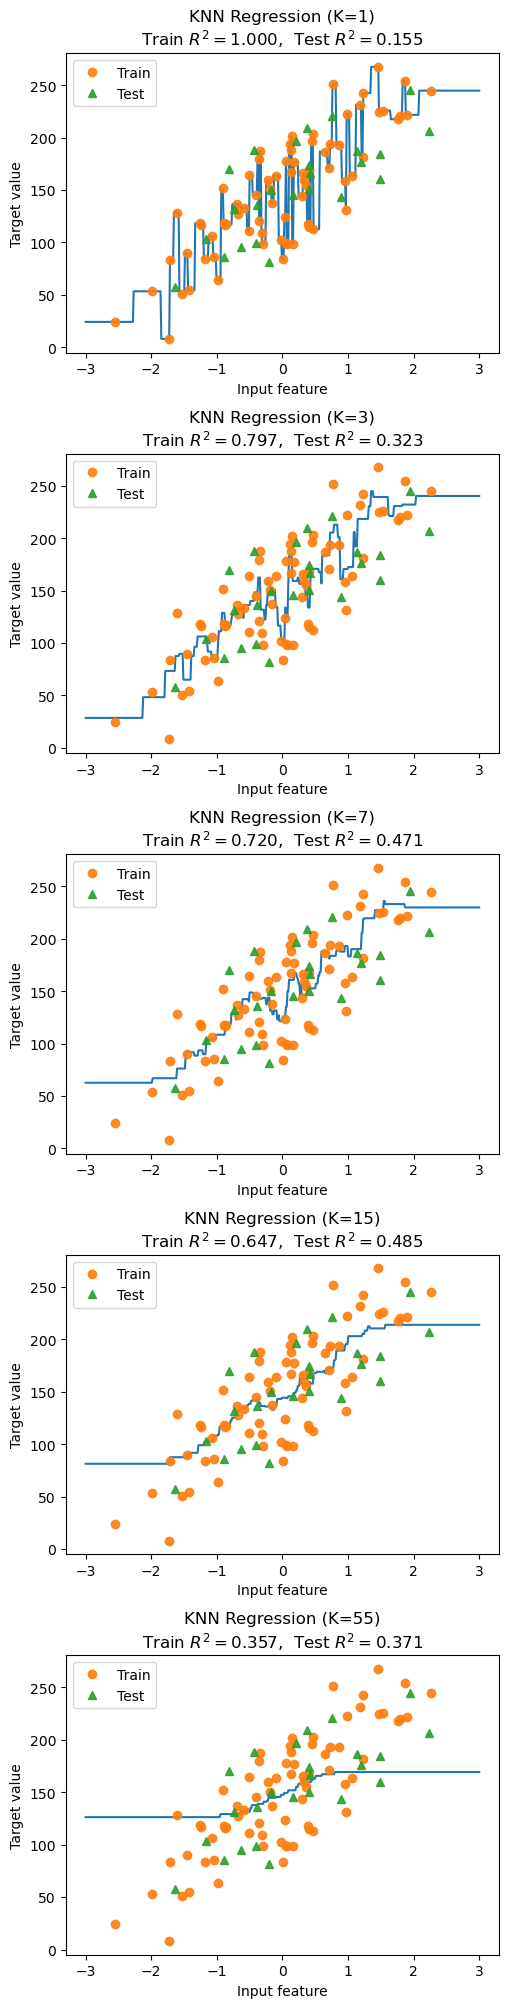

In [37]:
# plot k-NN regression on sample dataset for different values of K
fig, subaxes = plt.subplots(5, 1, figsize=(5,20))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 55]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


### MODELOS LINEALES PARA REGRESION

In [38]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)
#linreg = LinearRegression().fit(X_train, y_train)

linreg=LinearRegression()
linreg.fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [45.71]
linear model intercept (b): 148.446
R-squared score (training): 0.679
R-squared score (test): 0.492


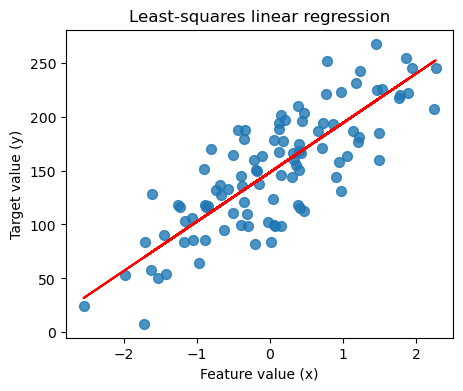

In [39]:
plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

### Normalizacion de los datos

El escalador sklearn.preprocessing.MinMaxScaler transforma las características escalándolas a un rango dado, por defecto (0,1), aunque puede ser personalizado. Este tipo de escalado suele denominarse frecuentemente "normalización" de los datos.
Para que funcionen mejor muchos algoritmos de Machine Learning usados en Data Science, hay que normalizar las variables de entrada al algoritmo. Normalizar significa, en este caso, comprimir o extender los valores de la variable para que estén en un rango definido.
 Los basados en distancias tambien se benefician al normalizarse las dimensiones (KNN, K Means)


https://scikit-learn.org/stable/modules/preprocessing.html

In [40]:

fruits = pd.read_table('fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)

knn = KNeighborsClassifier(n_neighbors = 5) # PROBAR DIFERENTES N PARA VER OVERFITTING
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))
print(knn.score(X_train,y_train))

0.5333333333333333
0.7954545454545454


In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

In [42]:
X_train_scaled

array([[0.49, 0.41, 0.28, 0.73],
       [0.94, 0.44, 0.35, 0.46],
       [0.  , 0.  , 0.  , 0.7 ],
       [0.51, 0.53, 0.27, 0.38],
       [0.46, 0.41, 0.31, 0.68],
       [0.72, 0.  , 0.2 , 0.49],
       [0.52, 0.35, 0.3 , 0.7 ],
       [0.51, 0.44, 0.28, 0.65],
       [0.63, 0.03, 0.14, 0.49],
       [0.48, 0.5 , 0.31, 0.76],
       [0.57, 0.15, 0.14, 0.46],
       [0.8 , 0.5 , 0.46, 0.59],
       [0.48, 0.56, 0.29, 0.38],
       [0.05, 0.  , 0.01, 0.59],
       [0.62, 0.59, 0.48, 0.73],
       [0.54, 0.53, 0.29, 0.32],
       [0.65, 0.06, 0.19, 0.43],
       [0.54, 0.5 , 0.3 , 0.84],
       [0.54, 0.06, 0.14, 0.46],
       [0.58, 0.38, 0.36, 1.  ],
       [0.57, 0.44, 0.31, 0.41],
       [0.8 , 1.  , 1.  , 0.54],
       [0.55, 0.5 , 0.33, 0.49],
       [0.63, 0.09, 0.15, 0.41],
       [0.69, 0.21, 0.27, 0.46],
       [0.62, 0.03, 0.15, 0.46],
       [0.58, 0.41, 0.29, 0.59],
       [0.43, 0.65, 0.37, 0.11],
       [0.48, 0.35, 0.28, 0.89],
       [0.8 , 0.41, 0.39, 0.46],
       [0.

In [43]:
knn = KNeighborsClassifier(n_neighbors = 5) # probar el 6

knn.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

example_fruit = [[5.5, 2.2, 10, 0.70]]
example_fruit_scaled = scaler.transform(example_fruit)
print('Predicted fruit type for ', example_fruit, ' is ', 
          target_names_fruits[knn.predict(example_fruit_scaled)[0]-1])

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00
Predicted fruit type for  [[5.5, 2.2, 10, 0.7]]  is  mandarin


/home/d321c6c9-7266-478d-aff0-3e1baf06d07f/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [44]:
### Ridge regression

In [45]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,random_state = 0)

#X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('Cancer dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Cancer dataset
ridge regression linear model intercept: 2.887658152365873
ridge regression linear model coeff:
[ 8.95e-02  4.97e-03 -6.53e-03 -9.39e-06 -1.71e-02 -2.49e-02 -4.94e-02
 -2.77e-02 -3.07e-02 -4.70e-03 -4.65e-02 -1.10e-02 -1.67e-02 -3.45e-04
 -2.54e-03  2.62e-04 -1.17e-03 -2.55e-03 -5.31e-03 -7.79e-05 -1.61e-01
 -1.56e-02 -6.49e-03  1.01e-03 -3.16e-02 -8.47e-02 -1.41e-01 -5.22e-02
 -6.76e-02 -1.53e-02]
R-squared score (training): 0.718
R-squared score (test): 0.701
Number of non-zero features: 30


In [46]:
##Ringe con Normalizacion

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,random_state = 0)

#X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: 1.4075287620294374
ridge regression linear model coeff:
[-0.16 -0.14 -0.16 -0.11 -0.07 -0.08 -0.12 -0.19 -0.07  0.07 -0.08 -0.
 -0.06 -0.03  0.03  0.05  0.03 -0.03 -0.    0.05 -0.2  -0.17 -0.18 -0.12
 -0.14 -0.11 -0.14 -0.28 -0.13 -0.05]
R-squared score (training): 0.698
R-squared score (test): 0.696
Number of non-zero features: 30


In [48]:
# Convert to DataFrame for better visualization
df = pd.DataFrame(data.data, columns=data.feature_names)
print("\nFeature Names:\n", data.feature_names)



Feature Names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [49]:
###efecto con alpha

In [50]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 8, r-squared training: 0.78, r-squared test: 0.73

Alpha = 1.00
num abs(coeff) > 1.0: 0, r-squared training: 0.75, r-squared test: 0.73

Alpha = 10.00
num abs(coeff) > 1.0: 0, r-squared training: 0.72, r-squared test: 0.71

Alpha = 20.00
num abs(coeff) > 1.0: 0, r-squared training: 0.70, r-squared test: 0.70

Alpha = 50.00
num abs(coeff) > 1.0: 0, r-squared training: 0.65, r-squared test: 0.65

Alpha = 100.00
num abs(coeff) > 1.0: 0, r-squared training: 0.57, r-squared test: 0.58

Alpha = 1000.00
num abs(coeff) > 1.0: 0, r-squared training: 0.16, r-squared test: 0.16



In [51]:
#LASSO

In [52]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=0.01, max_iter = 10000).fit(X_train_scaled, y_train)

print('Crime dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_cancer), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Crime dataset
lasso regression linear model intercept: 1.318335153150341
lasso regression linear model coeff:
[-0.   -0.1  -0.   -0.   -0.   -0.   -0.   -0.01 -0.    0.   -0.   -0.
 -0.   -0.   -0.    0.    0.   -0.   -0.    0.   -0.68 -0.08 -0.   -0.
 -0.   -0.   -0.   -1.06 -0.   -0.  ]
Non-zero features: 5
R-squared score (training): 0.690
R-squared score (test): 0.688

Features with non-zero weight (sorted by absolute magnitude):
	[1.86e+01 2.02e+01 1.22e+02 1.09e+03 9.44e-02 1.07e-01 1.49e-01 7.73e-02
 1.70e-01 5.70e-02 8.53e-01 1.85e+00 5.63e+00 9.35e+01 1.07e-02 2.72e-02
 5.08e-02 1.91e-02 2.29e-02 4.22e-03 2.13e+01 2.73e+01 1.40e+02 1.40e+03
 1.34e-01 2.12e-01 3.45e-01 1.49e-01 2.34e-01 7.42e-02], -1.056
	[1.31e+01 1.57e+01 8.56e+01 5.20e+02 1.07e-01 1.27e-01 4.57e-02 3.11e-02
 1.97e-01 6.81e-02 1.85e-01 7.48e-01 1.38e+00 1.47e+01 4.10e-03 1.90e-02
 1.70e-02 6.49e-03 1.68e-02 2.43e-03 1.45e+01 2.05e+01 9.61e+01 6.30e+02
 1.31e-01 2.78e-01 1.89e-01 7.28e-02 3.18e-01 8.18e-02], -

In [53]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.01, 0.05, 0.1, 1, 10]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.01
Features kept: 5, r-squared training: 0.69, r-squared test: 0.69

Alpha = 0.05
Features kept: 1, r-squared training: 0.42, r-squared test: 0.42

Alpha = 0.10
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00

Alpha = 1.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00

Alpha = 10.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00



### MODELOS LINEALES PARA REGRESION
### REGRESION LOGICTICA (LOGISTIC REGRESION)


A fruit with height 6 and width 8 is predicted to be: an apple
A fruit with height 10 and width 7 is predicted to be: not an apple
Accuracy of Logistic regression classifier on training set: 0.80
Accuracy of Logistic regression classifier on test set: 0.73


/tmp/ipykernel_162/516052444.py:21: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))
/tmp/ipykernel_162/516052444.py:26: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))


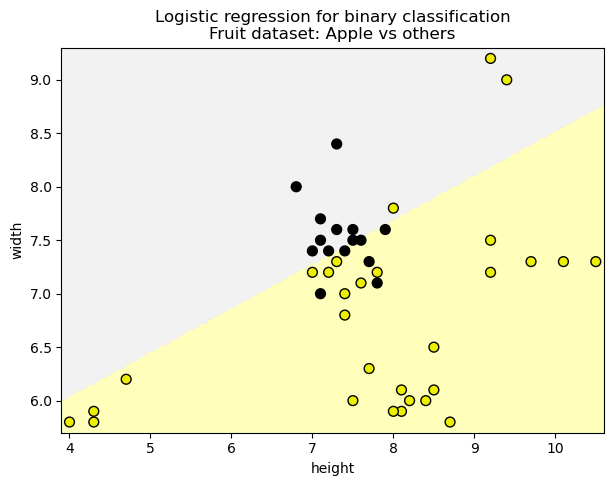

In [32]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (
plot_class_regions_for_classifier_subplot)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
y_fruits_apple = y_fruits_2d == 1   # make into a binary problem: apples vs everything else
X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.values,
                y_fruits_apple.values,
                random_state = 0))

clf = LogisticRegression(C=100).fit(X_train, y_train)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None,
                                         None, 'Logistic regression \
for binary classification\nFruit dataset: Apple vs others',
                                         subaxes)

h = 6
w = 8
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))

h = 10
w = 7
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))
subaxes.set_xlabel('height')
subaxes.set_ylabel('width')

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.81
Accuracy of Logistic regression classifier on test set: 0.84


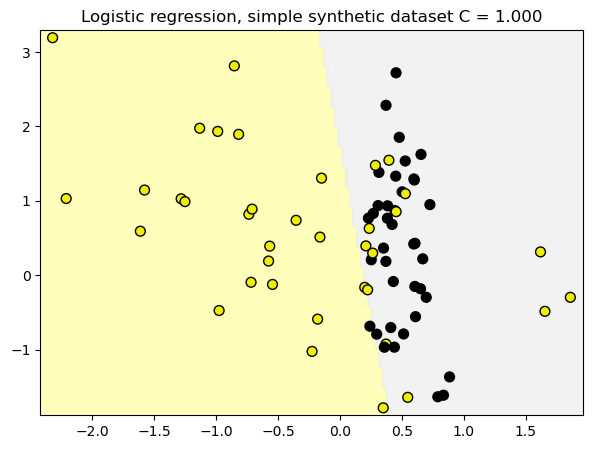

In [33]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (
plot_class_regions_for_classifier_subplot)


X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,
                                                   random_state = 0)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
clf = LogisticRegression().fit(X_train, y_train)
title = 'Logistic regression, simple synthetic dataset C = {:.3f}'.format(1.0)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                         None, None, title, subaxes)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

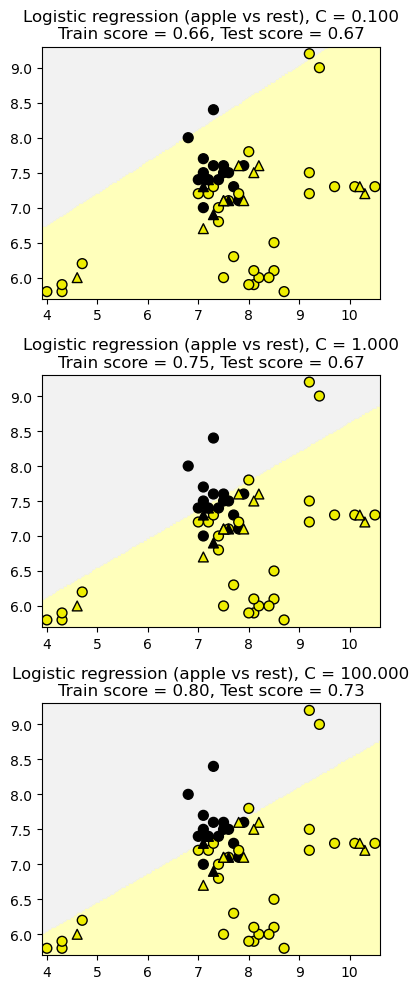

In [34]:
X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.values,
                y_fruits_apple.values,
                random_state=0))

fig, subaxes = plt.subplots(3, 1, figsize=(4, 10))

for this_C, subplot in zip([0.1, 1, 100], subaxes):
    clf = LogisticRegression(C=this_C).fit(X_train, y_train)
    title ='Logistic regression (apple vs rest), C = {:.3f}'.format(this_C)
    
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             X_test, y_test, title,
                                             subplot)
plt.tight_layout()

In [35]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LogisticRegression(max_iter=10000, C=10).fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of Logistic regression classifier on training set: 0.97
Accuracy of Logistic regression classifier on test set: 0.96
